# Some Useful Links:

### Make Moons Function Implementation:

- https://github.com/scikit-learn/scikit-learn/blob/3f89022fa/sklearn/datasets/_samples_generator.py#L786

**Generate data**

In [1]:
from sklearn.datasets import make_moons
from math import floor

N=1000
noise=0.1
training_percent=0.8

x, y = make_moons(n_samples=N, shuffle=True, noise=noise, random_state=5)

x_train, y_train = x[:floor(training_percent*N),:] , y[:floor(training_percent*N)]
x_valid, y_valid = x[floor(training_percent*N):,:] , y[floor(training_percent*N):]

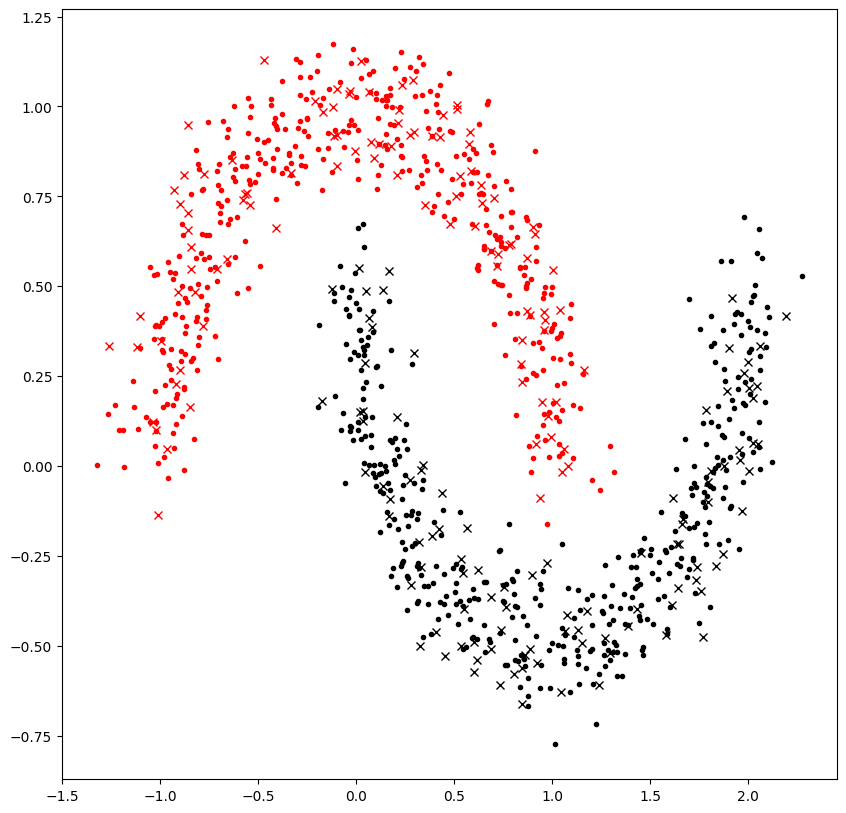

In [2]:
from matplotlib.pyplot import figure
import numpy as np

fig = figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1)

train_one_indices = np.argwhere(y_train == 1)
train_zero_indices = np.argwhere(y_train == 0)
ax.plot(x_train[train_one_indices, 0], x_train[train_one_indices, 1], "k.")
ax.plot(x_train[train_zero_indices, 0], x_train[train_zero_indices, 1], "r.")


valid_one_indices = np.argwhere(y_valid == 1)
valid_zero_indices = np.argwhere(y_valid == 0)
ax.plot(x_valid[valid_one_indices, 0], x_valid[valid_one_indices, 1], "kx")
ax.plot(x_valid[valid_zero_indices, 0], x_valid[valid_zero_indices, 1], "rx")

**ُEncode targets and move to pytorch**

In [3]:
import torch

x_train, y_train = torch.tensor(x_train), torch.tensor(y_train)
x_valid, y_valid = torch.tensor(x_valid), torch.tensor(y_valid)

y_train = torch.nn.functional.one_hot(y_train, num_classes=2)
y_valid = torch.nn.functional.one_hot(y_valid, num_classes=2)

print(y)

[1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1
 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0
 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0
 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0
 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1
 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0
 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0
 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 1
 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0
 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1
 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0
 0 0 0 0 1 0 1 1 0 0 0 1 

**Forward path**

In [4]:
torch.manual_seed(5)

w = torch.randn(size=(2,2))
w = w.to(torch.float64)
w.requires_grad=True
w.retain_grad()

b = torch.randn(size=(1,2))
b = b.to(torch.float64)
b.requires_grad=True
b.retain_grad()

In [5]:
def predict(x):
  a = x@w.t()+b
  return torch.softmax(a, dim=1)

In [6]:
# y_hat = predict(torch.tensor([[1., 1.],
#                               [2., 2.]]))
#y_hat

**Loss function**

In [7]:
def loss_fun(x, y):
  y_hat = predict(x)
  return torch.mean(-(y * torch.log(y_hat)).sum(dim=1))

**Optimization loop**

In [ ]:
delta=0.1
epochs=1000
train_loss, valid_loss = [], []

for _ in range(epochs):
  current_train_loss = loss_fun(x_train, y_train)
  current_train_loss.backward()
  train_loss.append(current_train_loss.data)

  with torch.no_grad():
    current_valid_loss = loss_fun(x_valid,y_valid)
    valid_loss.append(current_valid_loss.data)

    w -= delta*w.grad.data
    b -= delta*b.grad.data
    w.grad.zero_()         # underscore means inplace
    b.grad.zero_()

**Visualization**

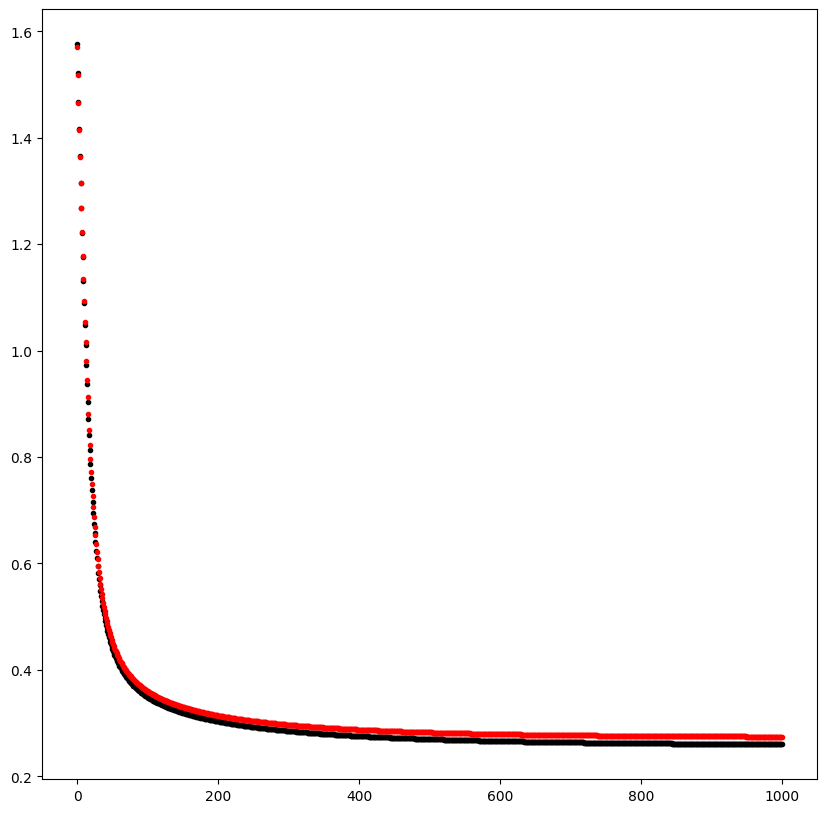

In [ ]:
fig = figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

ax.plot(train_loss, "k.")
ax.plot(valid_loss, "r.")

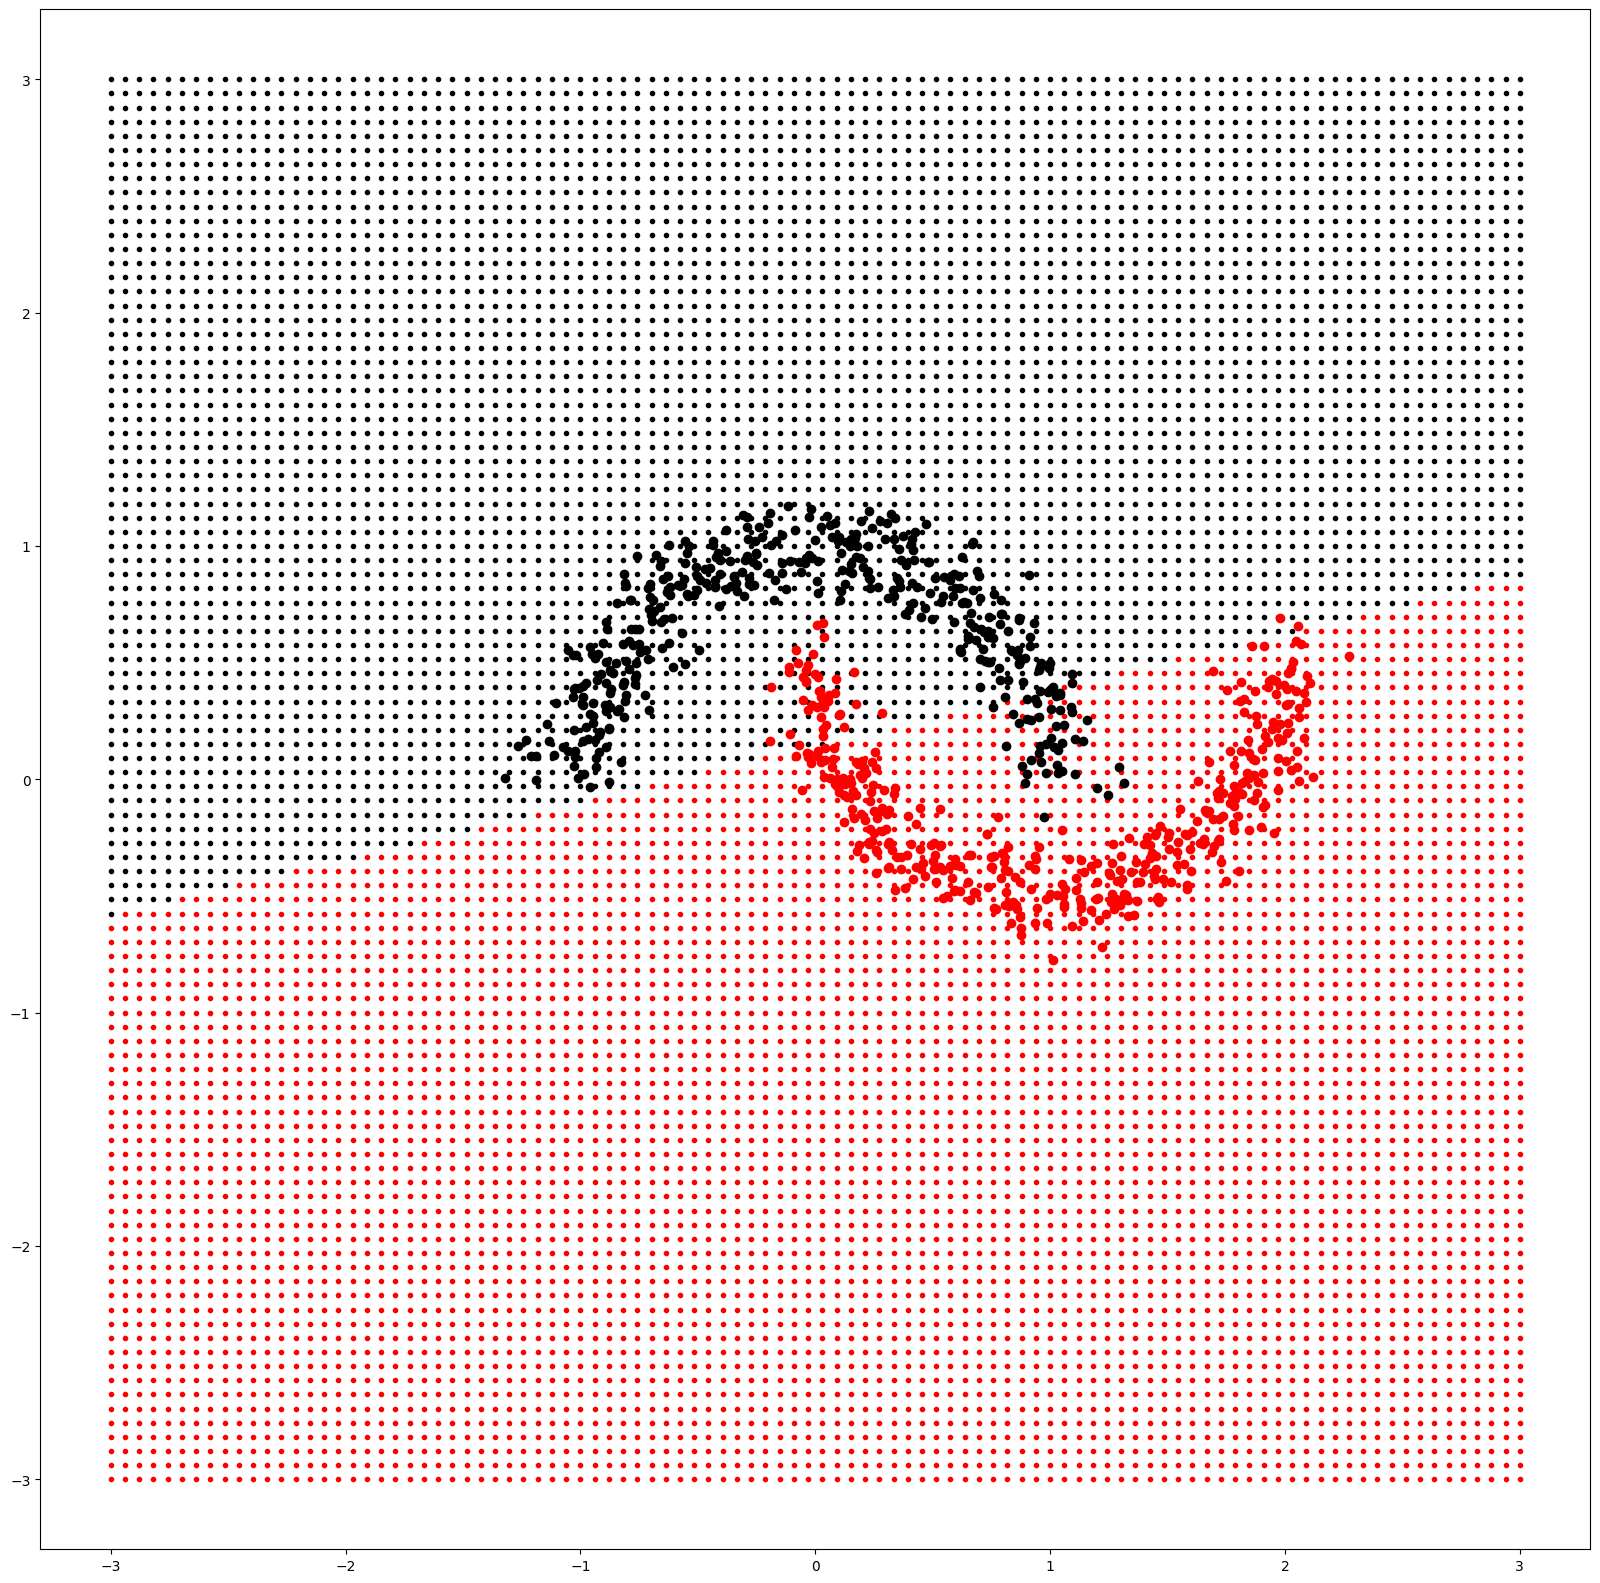

In [ ]:
with torch.no_grad():
  x_0 = torch.linspace(-3, 3, 100).repeat(1, 100).t()
  x_1 = torch.linspace(-3, 3, 100).repeat(100, 1).t().reshape(-1, 1)

  x = torch.hstack((x_0, x_1)).to(torch.double)

  x_plt = x.numpy()
  y_hat = predict(x)

  c_hat = torch.argmax(y_hat, dim=1)
  c_hat_plt = c_hat.numpy()


fig = figure(figsize=(20,20))
ax = fig.add_subplot(1, 1, 1)

ax.plot(x_plt[np.argwhere(c_hat_plt == 1), 0], x_plt[np.argwhere(c_hat_plt == 1), 1], 'r.')
ax.plot(x_plt[np.argwhere(c_hat_plt == 0), 0], x_plt[np.argwhere(c_hat_plt == 0), 1], 'k.')
ax.plot(x_train[train_one_indices, 0], x_train[train_one_indices, 1], 'ro')
ax.plot(x_train[train_zero_indices, 0], x_train[train_zero_indices, 1], 'ko')